In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
n=3
qc = QuantumCircuit(n)

for q in range(n):
    qc.h(q)

qc.draw(initial_state=True)

┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ H ├
        ├───┤
q_2: |0>┤ H ├
        └───┘

In [3]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [4]:
#  Single Qubit Gates on Multi-Qubit Statevectors 

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.measure_all()
qc1.draw(initial_state=True)


┌───┐ ░ ┌─┐   
  q_0: |0>┤ H ├─░─┤M├───
          ├───┤ ░ └╥┘┌─┐
  q_1: |0>┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
meas: 0 2/═════════╩══╩═
                   0  1

In [5]:
simulator = Aer.get_backend('aer_simulator')
qc1.save_statevector()
qobj = assemble(qc1)
final_statevector = simulator.run(qobj).result().get_statevector()

In [6]:
final_statevector

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

In [7]:
array_to_latex(final_statevector, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [8]:
# applying gate on one qubit

qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [9]:
# Simulate the unitary
qc2.save_unitary()
qobj = assemble(qc2)
unitary = simulator.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

2.1 Quick Exercises:

1. Calculate the single qubit unitary (U) created by the sequence of gates: U=XZH. Use Qiskit's Aer simulator to check your results.

2. Try changing the gates in the circuit above. Calculate their kronecker product, and then check your answer using the Aer simulator.

In [11]:
# creating U=XZH state

qc_ex1 = QuantumCircuit(1)
qc_ex1.x(0)
qc_ex1.z(0)
qc_ex1.h(0)
qc_ex1.draw(initial_state=True)

┌───┐┌───┐┌───┐
q: |0>┤ X ├┤ Z ├┤ H ├
      └───┘└───┘└───┘

In [12]:
qc_ex1.save_unitary()
qobj = assemble(qc_ex1)
unitary = simulator.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

In [16]:
# changing the order of gates

qc_ex2 = QuantumCircuit(1)
qc_ex2.h(0)
qc_ex2.z(0)
qc_ex2.x(0)
qc_ex2.draw(initial_state=True)


┌───┐┌───┐┌───┐
q: |0>┤ H ├┤ Z ├┤ X ├
      └───┘└───┘└───┘

In [17]:
qc_ex2.save_unitary()
qobj = assemble(qc_ex2)
unitary = simulator.run(qobj).result().get_unitary()

array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

In [20]:
# changing the order of gates

qc_ex3 = QuantumCircuit(1)
qc_ex3.z(0)
qc_ex3.x(0)
qc_ex3.h(0)
qc_ex3.draw(initial_state=True)

┌───┐┌───┐┌───┐
q: |0>┤ Z ├┤ X ├┤ H ├
      └───┘└───┘└───┘

In [21]:
qc_ex3.save_unitary()
qobj = assemble(qc_ex3)
unitary = simulator.run(qobj).result().get_unitary()

array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

## Multi-Qubit Gates

In [34]:
qc3 = QuantumCircuit(2)

qc3.h(0)
qc3.cx(0,1)

#  Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc3.save_statevector()
qobj = assemble(qc3)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

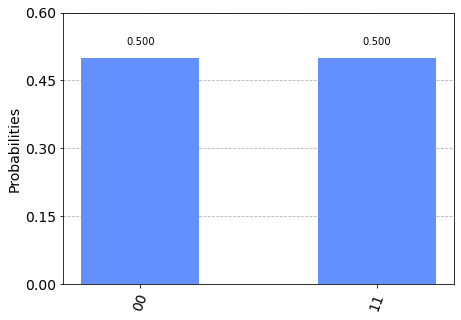

In [36]:
plot_histogram(svsim.run(qobj).result().get_counts())

3.4 Exercise: 

1. Create a quantum circuit that produces the Bell state: 1√2(|01⟩+|10⟩). Use the statevector simulator to verify your result.

In [110]:
qc_ex4 = QuantumCircuit(2)

qc_ex4.h(0)
qc_ex4.x(1)
qc_ex4.cx(0,1)

qc_ex4.save_unitary()
# qc_ex4.save_statevector()

qobj = assemble(qc_ex4)
# final_statevector= simulator.run(qobj).result().get_statevector()

In [111]:
array_to_latex(final_statevector, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [112]:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>